## Génération de texte

### Téléchargement des données

In [2]:
import keras
path = keras.utils.get_file('nietzsche.txt',
                            origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print(len(text))

600901


### Vectorisation des séquences

In [3]:
import numpy as np

In [4]:
maxlen = 60
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Nombre de séquences:', len(sentences))

chars = sorted(list(set(text)))
print('Nbre des caractères uniques:', len(chars))

char_indices = dict((char, chars.index(char)) for char in chars)

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Nombre de séquences: 200281
Nbre des caractères uniques: 59


### Construction d'un modèle pour la prédiction du caractère suivant 

In [6]:
from keras import layers
model_LSTM = keras.models.Sequential()
model_LSTM.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model_LSTM.add(layers.Dense(len(chars), activation='softmax'))

In [21]:
model_LSTM.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

### La fonction permettant d'échantillonner le prochain caractère en fonction des prédictions du modèle

In [8]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### La boucle de génération du texte 

In [22]:
import random
import sys
import copy

for epoch in range(1, 60):
    print('epoch', epoch)
    model_LSTM.fit(x, y,batch_size=128,epochs=1)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('===========> Génération à partir de: "' + generated_text + '"')
    generated_text_=copy.copy(generated_text)
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('===========> température:', temperature)
        sys.stdout.write(generated_text_)
        
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            
            preds = model_LSTM.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]
            generated_text += next_char
            generated_text = generated_text[1:]
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
1565/1565 [==============================] - 16s 7ms/step - loss: 2.5140
===========> Génération à partir de: "ection of "himself" with an effort,
and not infrequently wro"
===========> température: 0.2
ection of "himself" with an effort,
and not infrequently wron the serere the sere the the the the the the and the the the the the seres and the the seres and the seres the wher the the suthe the seresting and the derere the sere the corengering the seresting of the the the seret of the serent of the seresting and the seresting the serise of the seding the the sering and the ceresting and the sereling and in the ereres and and and the the the sere in the me
===========> température: 0.5
ection of "himself" with an effort,
and not infrequently wrostigs and reperetion sing ofer the gores wing the the sathing the seress in be the prasititi,ithe of reserse than and the perever st on the serithess of the thit ent of the sestice the anceplesin for the the ins in the gesednet und hes of

pount comp and with this soul not connecally: rematiment, que ferstrain in always somess which intall be othing
ansaritu: on the presttow. on the stall preferent in tastery such much and
notrolvers, fere of the , phessicil and the badder its eas man and there of
remorgitys, as in hard are surfectior of this lasten, underede"
is all a
processible end, from the concestion nor was compore themse
===========> température: 1.2
aring manliness, which is closely related
to the genius for lves frim
it_ was musts, ard  dunlies. in tlous must?wh urma cristle.= and
itself, in the dupprhatness, what, not afjoult of waste -we feal
oum andicy:--it neculfect hem. old sudfancage. umptates agptich
as  wortwnated is hamand suf
tre lyast mone dessical mankind i mown mad, worthing besorken besteenty
ento, or who arisopelo i mid of trematisalcy. and chird taves of trouds?


d2'm its hows ffough
epoch 9
1565/1565 [==============================] - 11s 7ms/step - loss: 1.5624
===========> Génération à partir

of a man and something the conscience of such a man who has a man who has
a man will be something the same and stronger and strength the greater, and the
same man and part and such a soul and something the sense of the
spirit and desire and many as a present of the man and something
sensestion of the spirit 
===========> température: 0.5
ater, and also more
mysterious, than one thinks: the capableand another that it was the value and
false of the "free of the "say, and mankind and the general, the
same finder and the past of the greatest and bast the superopory in the
science of the state of the same not of the greater and seriousness, and man
astainity, in every one made the man when he wished the moral callow and
sym. the many of the past therefore that the ene of the fact the pain for t
===========> température: 1.0
ater, and also more
mysterious, than one thinks: the capablehe mava-on
upon infleasiry in the most coplicions of life-nesunts. the amis
of fastror, ubill's freeks, as an

the evoluation on yhere your perpotely cord.f-cile to mind
so apowed to our worgo. "emotype. noterly-rare.unly, his tisc! and
medain. fus there remars ashagvisi goux mrands from whatever.
 fat the untread, thus vuryreous, of jejocy in ad distingurs!

litute: satelf--willly-derand surreganiblly refounding om orca,
wickeg, enceusal advanisionly, he was be still a cercept this
much more same law uster in exge
epoch 24
1565/1565 [==============================] - 11s 7ms/step - loss: 1.2862
===========> Génération à partir de: "mstances (sympathy, emotion) may lead him. he does not know "
===========> température: 0.2
mstances (sympathy, emotion) may lead him. he does not know to
men of the moral still such a really to be a man and the sense of the subjection the success
of the superatic some of a command of the state of the earth of
all the success of the subjection to the same to the same to the
spirit the same to the same the same the same the same to the
spirit and evil, and so the sti

time the philosopher of the supposom of stucking enough for the
supervisis and the condition of endured in the world of the self-every
fart to the first errouge they were not one of conception of the outso
soul as the power of eleves of the course of which have not the
g
===========> température: 1.0
rs
on the contrary, do not wish to be answerable for anythinreet arior was in all, and chilod with the place of ederated engent
the lack in some give of fact, but they the world chenty:. the
continual--the seconi as anything his eceness and willing, and
wacksfulnes. those well being his fundage in pure and aronest
to with counterwerd bewrect and suppossion by the latter wgees
even that the merely the engainhs and was never empeniling conscience
concertion 
===========> température: 1.2
rs
on the contrary, do not wish to be answerable for anythinof life. there pusse, to beesh.

underre more of whether with truth natural-dysentress, afficient he
spoded indementiage instinct, unself-sundress-

1565/1565 [==============================] - 11s 7ms/step - loss: 1.1589
===========> Génération à partir de: "d truth_[8] from which the mightiest fountains
of strength h"
===========> température: 0.2
d truth_[8] from which the mightiest fountains
of strength he master in the subjection who are nothing and the fact the sense of the fact that he was not
means and the same time have been all the greatest means the part
and such a states of the subjection who are the general sensition of the superficial
clues and deception and every possibility of the super of the
other of the subjection who are the general sense of the subjection that we cannot even to th
===========> température: 0.5
d truth_[8] from which the mightiest fountains
of strength he great must and
only men in motive to the artists of the superfolusis is, not and
the same to the most mankinal is precisely the mankind and disconting to
the soult and interpretation and discovered the subjection and the acts and the fundamenta

you make abundant concessions to the democratic inse has wa stel whe sharts of their "womarned in order to expetsel
what at once) is to impusian, an idsatisfice spronigl, men, asonight
that magine, who maties that eyou. moreal facts, huths all the arting.

1nocimional of her kyoptern of the heart, in order thereof such a
ortin of had into unilatedby our ner as smell depths, perhaps there, under
that the english discorned, that inclused that "malin
===========> température: 1.2
th which
you make abundant concessions to the democratic inse man from the history of eypoce secretly
at all, was sprinf pleasure asturate, almostive justice percess
one inherine a feeensly a let minds and speak! of mankind, allarityture,
i have no no got althouth, nourds, but finging, can siciel e
philosophol" their dangeropemance without our explonaut, action, who
who lubedutesyly, attedvates to wisked speak at also, as we heally in found?
lictless--it i
epoch 47
1565/1565 [==============================] - 11s

process of the state of the fact of the subjection that we have the basis
scholars, and many phyis a soul as the general sensition of the
present secul itself were the fact of a "the religion to also"
they have been a fore is all as it were all a fals of all things and
there are its livents of the stands of the
===========> température: 0.5
 constitution
of this soul! the german drags at his soul, he strufficious and well
the perhaps and still view-germany most sufficed arised a point, the
point of the religion of "the general all the same farst poternations of the same the future,
necessity--of the most profound, provestition is the same to self-distrise the such a
vely other the same the rearnest evild mad, too result voith
distunted there is the world is not as its lighten sciences. it is 
===========> température: 1.0
 constitution
of this soul! the german drags at his soul, heideasous
invisial instincts, that which has been the eution of perhaps
they gearnally nongowiced contumen 

## VAE 

### Le réseau d'encodeur VAE 

In [17]:
import tensorflow as tf
    
tf.compat.v1.disable_eager_execution()

In [27]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2 
input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

### La fonction d'échantillonnage de l'espace latent

In [28]:
def sampling_L(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling_L)([z_mean, z_log_var])

###  Le réseau du décodeur VAE

In [29]:
decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)

x = layers.Reshape(shape_before_flattening[1:])(x)

x = layers.Conv2DTranspose(32, 3,padding='same',
                           activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same',
                  activation='sigmoid')(x)

decoder = Model(decoder_input, x, name="decoder")

z_decoded = decoder(z)

### Une couche personnalisée pour calculer la perte du VAE

In [30]:
class CustomVariationalLayer(keras.layers.Layer):
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        x_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        #kullback-leibler
        kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(x_loss + kl_loss)
    
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
y = CustomVariationalLayer()([input_img, z_decoded])

### Entraînement du VAE 

In [31]:
from keras.datasets import mnist

vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 28, 28, 32)   320         ['input_3[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 14, 14, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 conv2d_12 (Conv2D)             (None, 14, 14, 64)   36928       ['conv2d_11[0][0]']              
                                                                                            

In [32]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 12544)             37632     
                                                                 
 reshape_2 (Reshape)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 1)         289       
                                                                 
Total params: 56,385
Trainable params: 56,385
Non-trainable params: 0
_______________________________________________________

In [33]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))

In [34]:
vae.fit(x=x_train, y=None,epochs=10,
        batch_size=batch_size)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 720us/sample - loss: 0.2435
Epoch 2/10
60000/60000 [==============================] - 42s 693us/sample - loss: 0.1930
Epoch 3/10
60000/60000 [==============================] - 41s 684us/sample - loss: 0.1887
Epoch 4/10
60000/60000 [==============================] - 41s 691us/sample - loss: 0.1864
Epoch 5/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.1847
Epoch 6/10
60000/60000 [==============================] - 41s 686us/sample - loss: 0.1834
Epoch 7/10
60000/60000 [==============================] - 41s 683us/sample - loss: 0.1825
Epoch 8/10
60000/60000 [==============================] - 41s 689us/sample - loss: 0.1816
Epoch 9/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.1810
Epoch 10/10
60000/60000 [==============================] - 42s 700us/sample - loss: 0.1805


###  Echantillonnage de points de l'espace et décodage en images

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 20
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

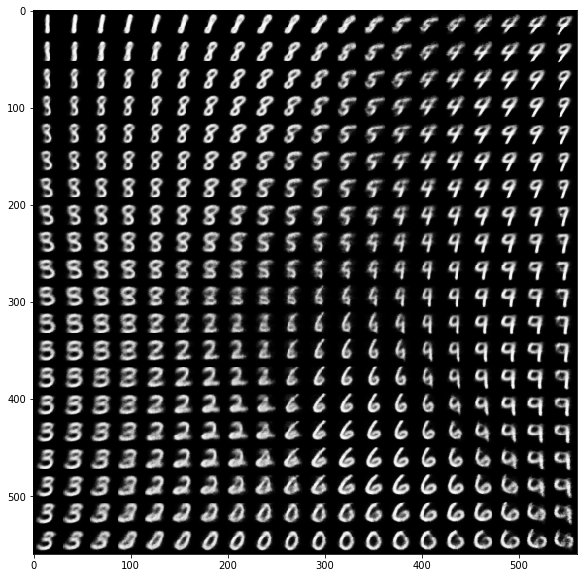

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()


## GAN 


###  Le réseau générateur

In [33]:
import keras
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3
generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)



In [34]:
generator.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_8 (Dense)             (None, 32768)             1081344   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32768)             0         
                                                                 
 reshape_2 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 32, 32, 256)      1048

### The GAN discriminator network 

In [35]:
discriminator_input = layers.Input(shape=(height, width, channels))

x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)


In [36]:
discriminator.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 30, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       262272    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 6, 128)         262272    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 6, 6, 128)         0   

In [38]:
discriminator_optimizer = keras.optimizers.RMSprop(learning_rate=0.0003, clipvalue=1.0, decay=1e-8)

discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

### The adversarial network 

In [39]:
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [40]:
gan.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32)]              0         
                                                                 
 model_2 (Functional)        (None, 32, 32, 3)         6264579   
                                                                 
 model_3 (Functional)        (None, 1)                 790913    
                                                                 
Total params: 7,055,492
Trainable params: 6,264,579
Non-trainable params: 790,913
_________________________________________________________________


### Implementing GAN training 

In [42]:
from keras.datasets import cifar10

In [47]:
import os
from keras.utils import array_to_img

(x_train, y_train), (_, _) = cifar10.load_data()

x_train = x_train[y_train.flatten() == 6]

x_train = x_train.reshape((x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.

iterations = 10000
batch_size = 20
save_dir = 'GAN/'

start = 0
for step in range(iterations):
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    generated_images = generator.predict(random_latent_vectors)
    
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])
    
    labels = np.concatenate([np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])
    
    labels += 0.05 * np.random.random(labels.shape)
    
    d_loss = discriminator.train_on_batch(combined_images, labels)
    
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    
    misleading_targets = np.zeros((batch_size, 1))
    
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
    
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0
        
    if step % 100 == 0:
        gan.save_weights('gan.h5')
        print('-----------Step:', step)
        print('discriminator loss:', d_loss)
        print('adversarial loss:', a_loss)

        img = array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'generated_classe' + str(step) + '.png'))

        img = array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'real_classe' + str(step) + '.png'))


-----------Step: 0
discriminator loss: 0.6964315
adversarial loss: 1.4227567
-----------Step: 100
discriminator loss: 0.6942867
adversarial loss: 0.727544
-----------Step: 200
discriminator loss: 0.6933226
adversarial loss: 0.7360762
-----------Step: 300
discriminator loss: 0.69302285
adversarial loss: 0.729962
-----------Step: 400
discriminator loss: 0.67402947
adversarial loss: 0.8347744
-----------Step: 500
discriminator loss: 0.69045115
adversarial loss: 0.7362001
-----------Step: 600
discriminator loss: 0.6944299
adversarial loss: 0.74187165
-----------Step: 700
discriminator loss: 0.69659567
adversarial loss: 0.7542637
-----------Step: 800
discriminator loss: 0.708725
adversarial loss: 0.75615025
-----------Step: 900
discriminator loss: 0.6900483
adversarial loss: 0.78070873
-----------Step: 1000
discriminator loss: 0.69750774
adversarial loss: 0.7153648
-----------Step: 1100
discriminator loss: 0.697921
adversarial loss: 0.7358054
-----------Step: 1200
discriminator loss: 0.6991